In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00


Now, let's load the YOLOv11n model and perform inference on the image.


0: 640x640 1 vasc, 222.2ms
1: 640x640 1 mel, 222.2ms
2: 640x640 1 nv, 222.2ms
3: 640x640 1 nv, 222.2ms
Speed: 3.1ms preprocess, 222.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2
Annotated image 1 saved at: /content/runs/detect/predict2/vasc_2_jpg.rf.2fd3ea4e66b314e917fee320771dab0b.jpg


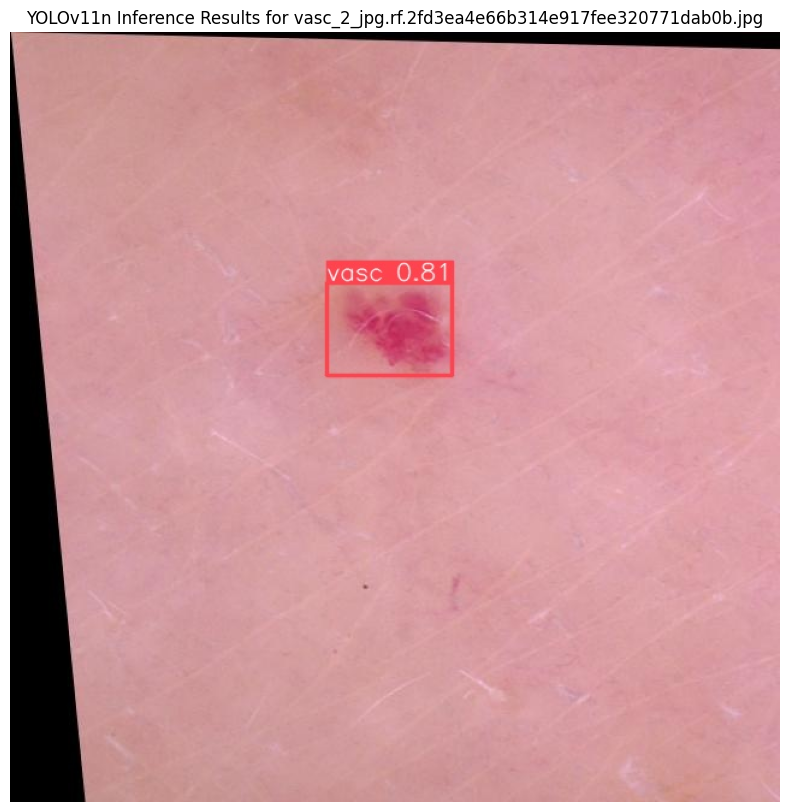

Annotated image 2 saved at: /content/runs/detect/predict2/mel_1091_jpg.rf.ab4f34cc0afc06b1dee49f8db1daacda.jpg


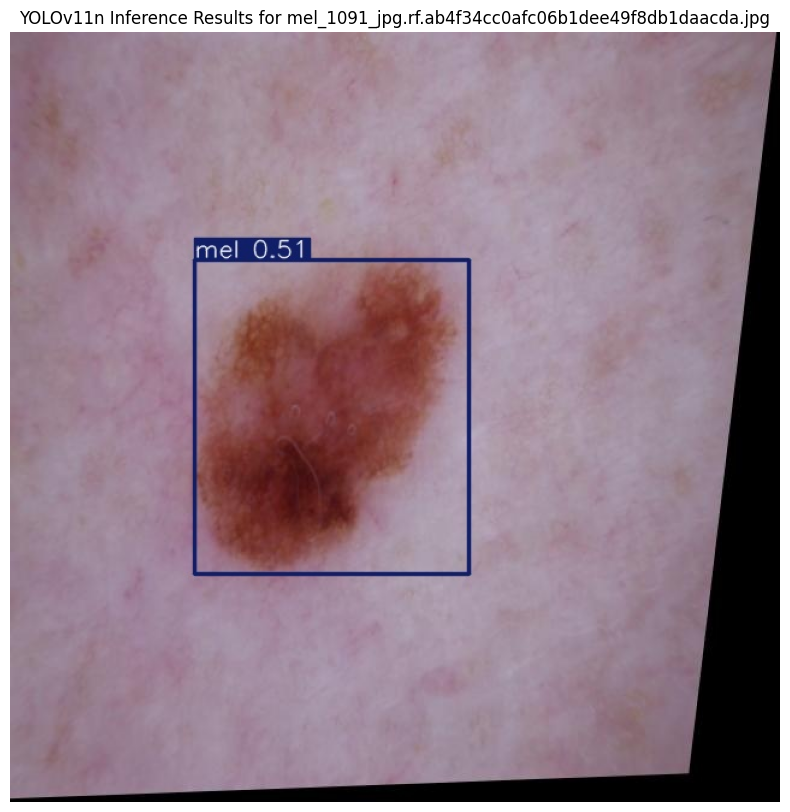

Annotated image 3 saved at: /content/runs/detect/predict2/nv_662_jpg.rf.ea98f2547d03fbb439c72860e47e6a60.jpg


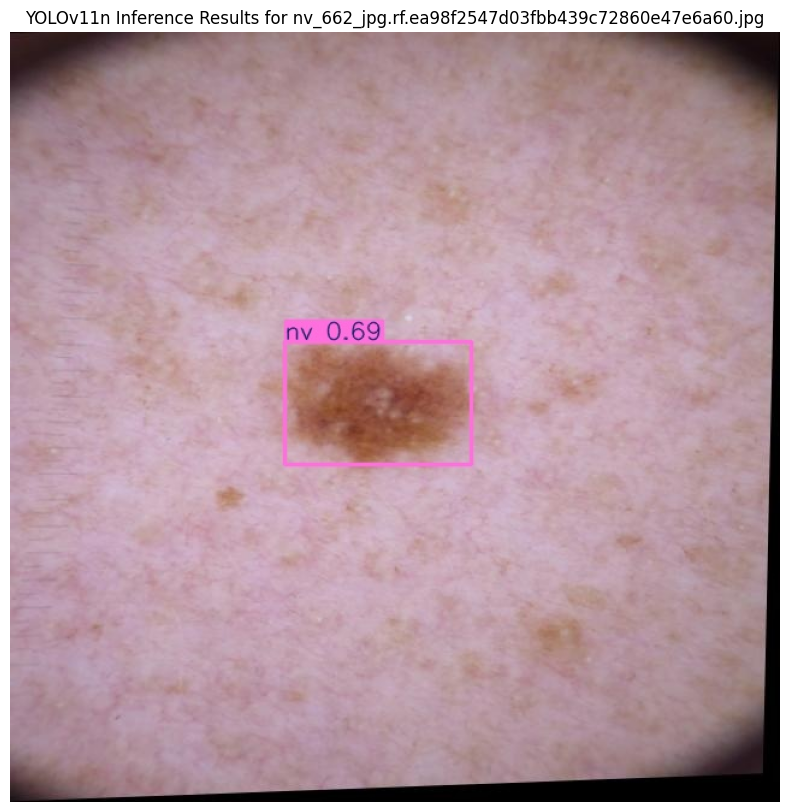

Annotated image 4 saved at: /content/runs/detect/predict2/nv_662_jpg.rf.ea98f2547d03fbb439c72860e47e6a60.jpg


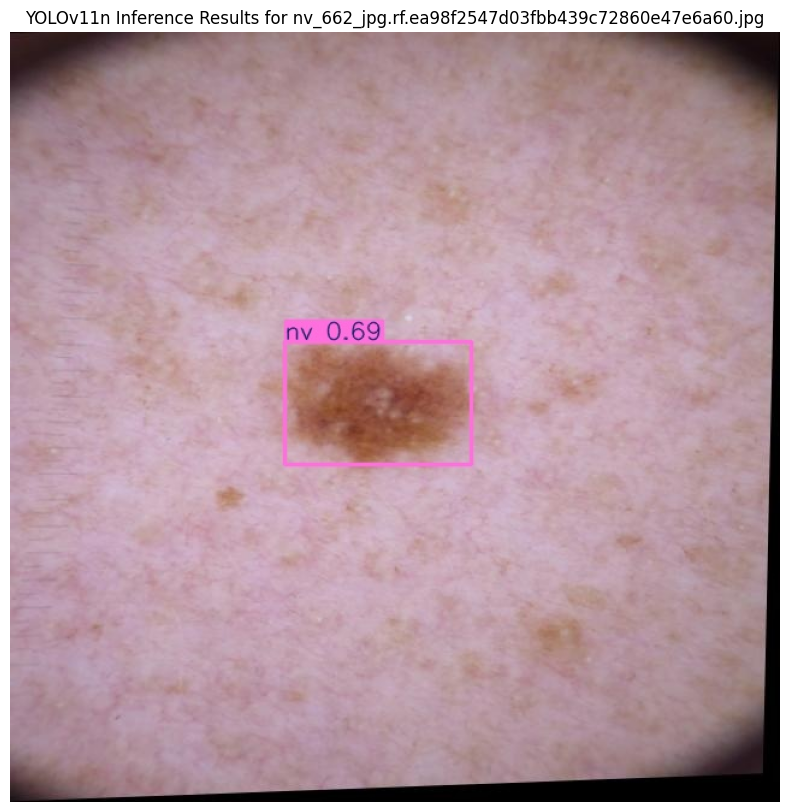

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the YOLOv11n model
model = YOLO('/best.pt')  # Ensure this path is correct #pourqoui best.pt

# Define the list of image paths for inference
image_paths = ['/vasc_2_jpg.rf.2fd3ea4e66b314e917fee320771dab0b.jpg','/mel_1091_jpg.rf.ab4f34cc0afc06b1dee49f8db1daacda.jpg', '/nv_662_jpg.rf.ea98f2547d03fbb439c72860e47e6a60.jpg', '/nv_662_jpg.rf.ea98f2547d03fbb439c72860e47e6a60.jpg'] # comment

# Perform inference on the images
# Setting stream=True can be more memory efficient for large numbers of images
# Results will be a generator if stream=True, or a list of Results objects otherwise
results_list = model.predict(source=image_paths, save=True, conf=0.5)

# Display the results for each image
if results_list:
    for i, results in enumerate(results_list):
        # Each 'results' object corresponds to one image from the 'image_paths' list
        # Get the directory where results are saved for this specific image
        output_dir = results.save_dir

        # Get original image file name
        original_image_name = image_paths[i].split('/')[-1]

        # Construct the full path to the annotated image
        # Ultralytics typically saves to predictN/image_name.jpg
        output_image_path = f"{output_dir}/{original_image_name}"

        print(f"Annotated image {i+1} saved at: {output_image_path}")

        # Display the annotated image
        img = mpimg.imread(output_image_path)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'YOLOv11n Inference Results for {original_image_name}')
        plt.show()
else:
    print("No results found or inference failed.")